# Análisis de Bigramas desde cero en Hipnogramas del Sueño

Este notebook demuestra cómo extraer y analizar bigramas (pares de etapas consecutivas) y trigramas (tripletas de etapas consecutivas) a partir de hipnogramas del sueño.

## ¿Para qué sirven los N-gramas?

Los n-gramas capturan **patrones secuenciales** en los hipnogramas:
- **Bigramas**: Transiciones entre etapas (ej: "2→3" es progresión normal)
- **Trigramas**: Secuencias de 3 etapas (ej: "2→3→4" es consolidación del sueño profundo)
- **N-gramas**: Patrones más largos capturan ciclos completos

**Fórmulas relevantes:**

Para un hipnograma de longitud $n$, el número de bigramas es $n-1$:
$$\text{Número de bigramas} = n - 1$$

Para trigramas, es $n-2$:
$$\text{Número de trigramas} = n - 2$$

En general, para n-gramas de tamaño $k$:
$$\text{Número de k-gramas} = n - k + 1$$

La **frecuencia** de cada n-grama es:
$$f(w_1 \to w_2) = \frac{\text{count}(w_1 \to w_2)}{N_{\text{total bigramas}}}$$

La **probabilidad** de transición es:
$$P(w_2 | w_1) = \frac{f(w_1 \to w_2)}{\sum_{w} f(w_1 \to w)}$$


In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style("whitegrid")

## 1. Carga de Datos

Cargaremos el hipnograma del paciente AR_2. Según el README:
- Columna 1: número de época
- Columna 2: scor clean (clasificación limpia)
- Columna 3: scor quasi-clean (validación) ← **Usaremos esta**


In [5]:
def cargar_hipnograma(archivo):
    """Carga un hipnograma y extrae la columna de validación (scor quasi-clean)"""
    df = pd.read_csv(archivo, sep='\s+', header=None, names=['epoch', 'scor_clean', 'scor_quasi'])
    return df['scor_quasi'].tolist()  # Usar columna 3 (validación)

# Cargar hipnograma del paciente AR_2
hipnograma_ar2 = cargar_hipnograma('../Datos/Scoring_AR_2')

print(f"Hipnograma cargado con {len(hipnograma_ar2)} épocas")
print(f"Primeras 20 etapas: {hipnograma_ar2[:20]}")
print(f"\nÚltimas 20 etapas: {hipnograma_ar2[-20:]}")

# Distribución de etapas
distribucion = Counter(hipnograma_ar2)
print(f"\nDistribución la Frecuencia de etapas:")
for etapa, count in sorted(distribucion.items()):
    print(f"  Etapa {etapa}: {count} épocas ({count/len(hipnograma_ar2)*100:.1f}%)")


Hipnograma cargado con 977 épocas
Primeras 20 etapas: [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 6, 0, 0, 0, 0]

Últimas 20 etapas: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6]

Distribución la Frecuencia de etapas:
  Etapa 0: 8 épocas (0.8%)
  Etapa 1: 22 épocas (2.3%)
  Etapa 2: 482 épocas (49.3%)
  Etapa 3: 39 épocas (4.0%)
  Etapa 4: 147 épocas (15.0%)
  Etapa 5: 231 épocas (23.6%)
  Etapa 6: 34 épocas (3.5%)
  Etapa 7: 14 épocas (1.4%)


## 2. Extracción de Bigramas

Un bigrama es un par consecutivo de etapas: $(etapa_i, etapa_{i+1})$


In [6]:
def extraer_bigramas(hipnograma):
    """Extrae bigramas (pares de etapas consecutivas) de un hipnograma"""
    bigramas = []
    bigramas_str = []
    
    for i in range(len(hipnograma) - 1):
        bigrama = (hipnograma[i], hipnograma[i+1])
        bigramas.append(bigrama)
        bigramas_str.append(f"{hipnograma[i]}→{hipnograma[i+1]}")
    
    return bigramas, bigramas_str

# Extraer bigramas del hipnograma AR_2
bigramas, bigramas_str = extraer_bigramas(hipnograma_ar2)

print(f"  Total de bigramas extraídos: {len(bigramas)}")
print(f"  (Fórmula: n-1 = {len(hipnograma_ar2)}-1 = {len(hipnograma_ar2)-1})")
print(f"\nBigramas:")
for i, bg in enumerate(bigramas_str[:]):
    print(f"  Época {i+1}-{i+2}: {bg}")


  Total de bigramas extraídos: 976
  (Fórmula: n-1 = 977-1 = 976)

Bigramas:
  Época 1-2: 7→7
  Época 2-3: 7→7
  Época 3-4: 7→7
  Época 4-5: 7→7
  Época 5-6: 7→7
  Época 6-7: 7→7
  Época 7-8: 7→7
  Época 8-9: 7→7
  Época 9-10: 7→7
  Época 10-11: 7→7
  Época 11-12: 7→7
  Época 12-13: 7→7
  Época 13-14: 7→7
  Época 14-15: 7→0
  Época 15-16: 0→6
  Época 16-17: 6→0
  Época 17-18: 0→0
  Época 18-19: 0→0
  Época 19-20: 0→0
  Época 20-21: 0→0
  Época 21-22: 0→0
  Época 22-23: 0→1
  Época 23-24: 1→1
  Época 24-25: 1→2
  Época 25-26: 2→2
  Época 26-27: 2→2
  Época 27-28: 2→2
  Época 28-29: 2→2
  Época 29-30: 2→2
  Época 30-31: 2→2
  Época 31-32: 2→2
  Época 32-33: 2→2
  Época 33-34: 2→2
  Época 34-35: 2→2
  Época 35-36: 2→2
  Época 36-37: 2→3
  Época 37-38: 3→2
  Época 38-39: 2→3
  Época 39-40: 3→2
  Época 40-41: 2→2
  Época 41-42: 2→2
  Época 42-43: 2→2
  Época 43-44: 2→2
  Época 44-45: 2→3
  Época 45-46: 3→3
  Época 46-47: 3→2
  Época 47-48: 2→3
  Época 48-49: 3→4
  Época 49-50: 4→4
  Época 5

## 3. Tabla de Frecuencias de Bigramas


In [9]:
# Contar frecuencias de bigramas
contador_bigramas = Counter(bigramas)

# Crear DataFrame para análisis
df_bigramas = pd.DataFrame([
    {'Transición': f"{str(bg[0])}→{str(bg[1])}", 
     'Desde': bg[0], 
     'Hacia': bg[1], 
     'Frecuencia': count,
     'Probabilidad': count/len(bigramas)} 
    for bg, count in contador_bigramas.items()
])

df_bigramas = df_bigramas.sort_values('Frecuencia', ascending=False)

print("\nTRANSICIONES\n")
print(df_bigramas.to_string(index=False))

print(f"\nTotal de transiciones únicas: {len(df_bigramas)}")



TRANSICIONES

Transición  Desde  Hacia  Frecuencia  Probabilidad
       2→2      2      2         436      0.446721
       5→5      5      5         224      0.229508
       4→4      4      4         137      0.140369
       2→3      2      3          20      0.020492
       3→2      3      2          16      0.016393
       2→6      2      6          16      0.016393
       1→2      1      2          15      0.015369
       3→3      3      3          13      0.013320
       7→7      7      7          13      0.013320
       6→2      6      2          11      0.011270
       6→6      6      6          10      0.010246
       6→1      6      1           9      0.009221
       3→4      3      4           9      0.009221
       2→5      2      5           7      0.007172
       1→1      1      1           7      0.007172
       4→6      4      6           5      0.005123
       4→3      4      3           5      0.005123
       0→0      0      0           5      0.005123
       5→2      

## 4. Matriz de Transiciones (Visualización de Bigramas)

Crearemos una matriz de Markov que muestra las probabilidades de transición entre etapas



MATRIZ DE TRANSICIONES DE BIGRAMAS (Valores absolutos)

   0  1    2   3    4    5   6   7
0  5  2    0   0    0    0   1   0
1  0  7   15   0    0    0   0   0
2  0  2  436  20    1    7  16   0
3  0  0   16  13    9    0   1   0
4  0  0    0   5  137    0   5   0
5  0  2    4   0    0  224   1   0
6  2  9   11   1    0    0  10   0
7  1  0    0   0    0    0   0  13

MATRIZ DE PROBABILIDADES DE TRANSICIÓN


Interpretación: P(etapa siguiente | etapa actual)

Filas = etapa actual, Columnas = etapa siguiente

       0      1      2      3      4      5      6      7
0  0.625  0.250  0.000  0.000  0.000  0.000  0.125  0.000
1  0.000  0.318  0.682  0.000  0.000  0.000  0.000  0.000
2  0.000  0.004  0.905  0.041  0.002  0.015  0.033  0.000
3  0.000  0.000  0.410  0.333  0.231  0.000  0.026  0.000
4  0.000  0.000  0.000  0.034  0.932  0.000  0.034  0.000
5  0.000  0.009  0.017  0.000  0.000  0.970  0.004  0.000
6  0.061  0.273  0.333  0.030  0.000  0.000  0.303  0.000
7  0.071  0.000  0.00

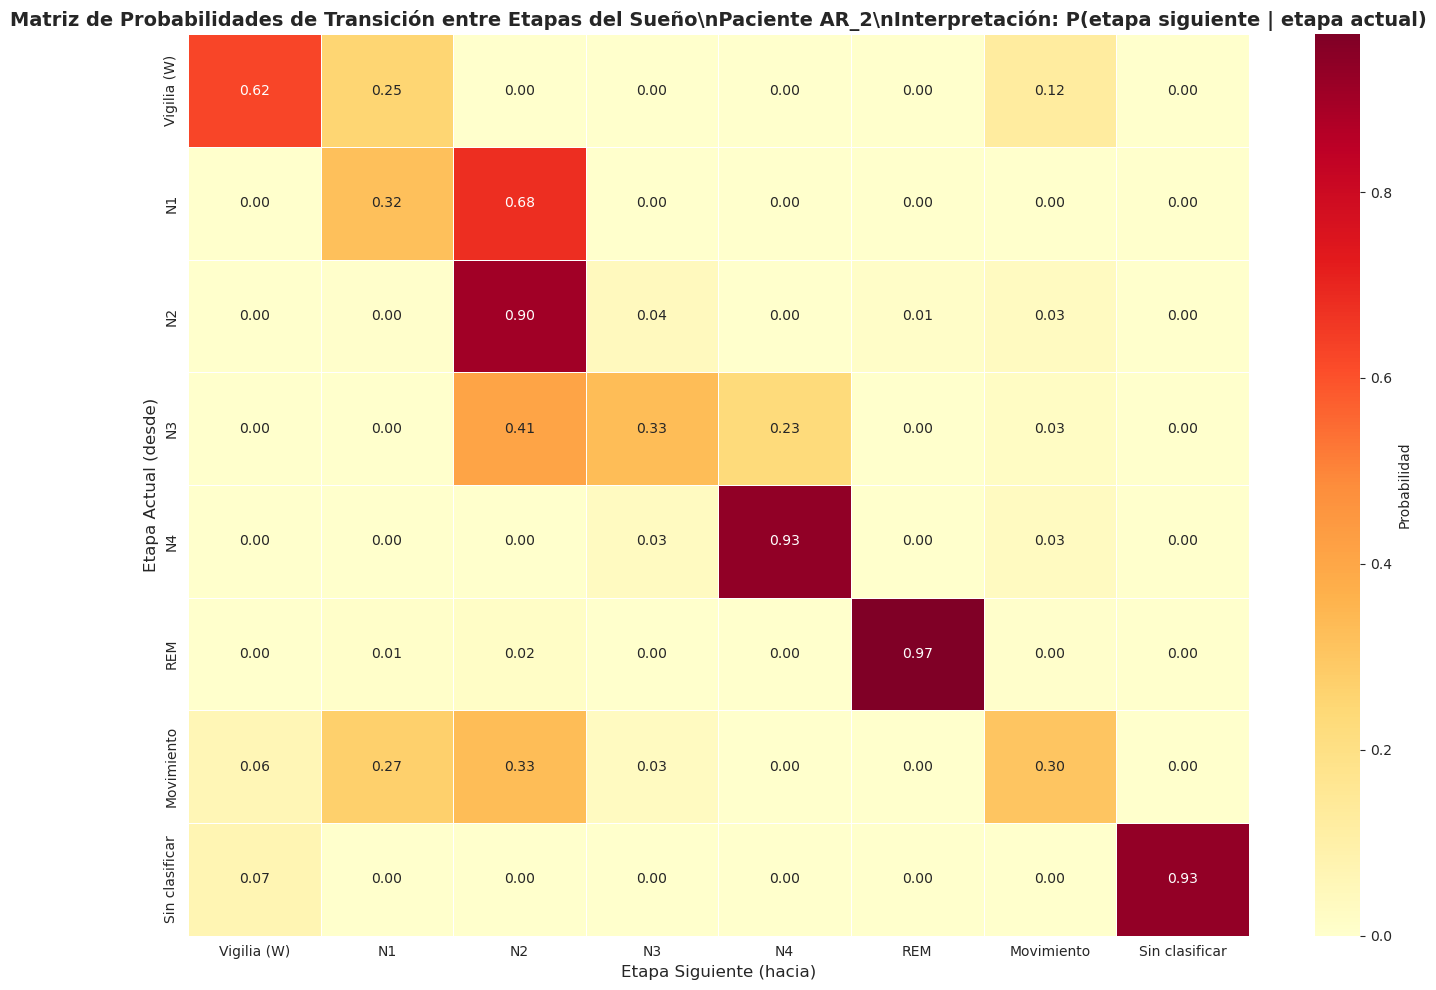

In [14]:
def crear_matriz_transiciones(bigramas):
    """Crea una matriz de transiciones (similar a matriz de Markov)"""
    contador = Counter(bigramas)
    
    # Ordenar etapas según el orden clínico natural del sueño:
    # 0=Vigilia, 1=N1, 2=N2, 3=N3, 4=N4, 5=REM, 6=Movimiento, 7=Sin clasificar
    etapas_ordenadas = sorted(set([item for sublist in bigramas for item in sublist]))
    
    # Crear matriz de transiciones (valores absolutos)
    matriz = pd.DataFrame(0, index=etapas_ordenadas, columns=etapas_ordenadas, dtype=int)
    
    for (desde, hacia), count in contador.items():
        matriz.loc[desde, hacia] = count
    
    return matriz

# Crear matriz de transiciones
matriz_transiciones = crear_matriz_transiciones(bigramas)

print("\nMATRIZ DE TRANSICIONES DE BIGRAMAS (Valores absolutos)\n")
print(matriz_transiciones)

# Convertir a probabilidades (normalizar por filas)
# IMPORTANTE: Las filas son "desde", las columnas son "hacia"
# P(hacia | desde) donde desde=filas, hacia=columnas
matriz_probabilidades = matriz_transiciones.div(matriz_transiciones.sum(axis=1), axis=0)
matriz_probabilidades = matriz_probabilidades.fillna(0)

print("\nMATRIZ DE PROBABILIDADES DE TRANSICIÓN\n")
print("\nInterpretación: P(etapa siguiente | etapa actual)")
print("\nFilas = etapa actual, Columnas = etapa siguiente\n")
print(matriz_probabilidades.round(3))

# Visualización con heatmap
plt.figure(figsize=(14, 10))

# Mapeo de números a nombres de etapas en orden clínico
mapa_etapas = {0: 'Vigilia (W)', 1: 'N1', 2: 'N2', 3: 'N3', 4: 'N4', 5: 'REM', 6: 'Movimiento', 7: 'Sin clasificar'}

# Obtener etiquetas ordenadas
etapas = matriz_probabilidades.index.tolist()
labels = [mapa_etapas.get(etapa, f'Etapa {etapa}') for etapa in etapas]

sns.heatmap(matriz_probabilidades, 
            annot=True, 
            fmt='.2f', 
            cmap='YlOrRd',
            cbar_kws={'label': 'Probabilidad'},
            xticklabels=labels,
            yticklabels=labels,
            linewidths=0.5)

plt.title('Matriz de Probabilidades de Transición entre Etapas del Sueño\\nPaciente AR_2\\n' +
          'Interpretación: P(etapa siguiente | etapa actual)', 
          fontsize=14, fontweight='bold')
plt.ylabel('Etapa Actual (desde)', fontsize=12)
plt.xlabel('Etapa Siguiente (hacia)', fontsize=12)
plt.tight_layout()
plt.show()